In [23]:
# 1. Import libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# 2. Load dataset (Iris dataset for multiclass classification)
iris = load_iris()
X, y = iris.data, iris.target

# Split into train-test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 3. Multinomial Logistic Regression
multi_model = LogisticRegression(
    multi_class='multinomial', solver='lbfgs', max_iter=1000
)
multi_model.fit(X_train, y_train)
y_pred_multi = multi_model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred_multi))
print(classification_report(y_test, y_pred_multi, target_names=iris.target_names))


# 4. One-vs-Rest Logistic Regression
ovr_model = LogisticRegression(
    multi_class='ovr', solver='lbfgs', max_iter=1000
)
ovr_model.fit(X_train, y_train)
y_pred_ovr = ovr_model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred_ovr))
print(classification_report(y_test, y_pred_ovr, target_names=iris.target_names))


Accuracy: 1.0
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Accuracy: 0.9555555555555556
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.85      0.92        13
   virginica       0.87      1.00      0.93        13

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



<Figure size 500x500 with 0 Axes>

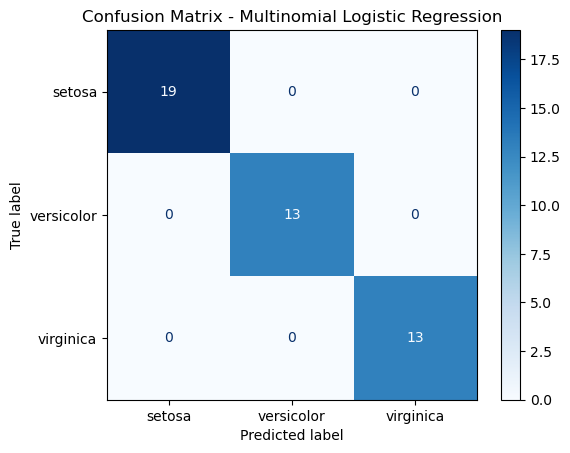

<Figure size 500x500 with 0 Axes>

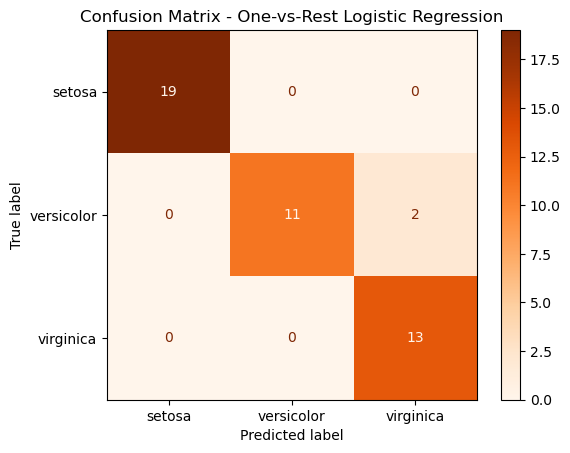

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix for Multinomial Logistic Regression
cm_multi = confusion_matrix(y_test, y_pred_multi)
disp_multi = ConfusionMatrixDisplay(confusion_matrix=cm_multi, display_labels=iris.target_names)

plt.figure(figsize=(5,5))
disp_multi.plot(cmap="Blues", values_format='d')  # 'd' = integer counts
plt.title("Confusion Matrix - Multinomial Logistic Regression")
plt.show()

# Confusion matrix for OvR Logistic Regression
cm_ovr = confusion_matrix(y_test, y_pred_ovr)
disp_ovr = ConfusionMatrixDisplay(confusion_matrix=cm_ovr, display_labels=iris.target_names)

plt.figure(figsize=(5,5))
disp_ovr.plot(cmap="Oranges", values_format='d')
plt.title("Confusion Matrix - One-vs-Rest Logistic Regression")
plt.show()


In [27]:
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define multinomial logistic regression
log_reg = LogisticRegression(
    multi_class='multinomial', solver='lbfgs', max_iter=1000
)

# Define grid of C values (logarithmic scale)
param_grid = {'C': np.logspace(-3, 3, 10)}  # from 0.001 to 1000

# GridSearch with 5-fold cross-validation
grid = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

print("Best C:", grid.best_params_['C'])
print("Best CV Accuracy:", grid.best_score_)

# Evaluate on test set with best model
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Test Accuracy with Best C:", accuracy_score(y_test, y_pred_best))


Best C: 2.154434690031882
Best CV Accuracy: 0.9619047619047618
Test Accuracy with Best C: 1.0
